# Исследование рынка заведений общественного питания в Москве

**Описание проекта**

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны будут обслуживать роботы. Проект многообещающий, но дорогостоющий. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность в перспективе, когда все зеваки насмотрятся на роботов-официантов?

У нас есть открытые данные о заведениях общественного питания в Москве, и партнёры просят нас подготовить исследование рынка.

## Изучение имеющихся данных

Для начала импортируем необходимые нам библиотеки и посмотрим на наш датафрйм

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np
from io import BytesIO
import plotly
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
df.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


**Итого**

Всего в нашей таблице 15366 строк и шесть столбцов. Типы данных, встречаемых в столбцах: int и object.

Описание данных согласно документации:

*id* — идентификатор объекта;
*object_name* — название объекта общественного питания;
*chain* — сетевой ресторан;
*object_type* — тип объекта общественного питания;
*address* — адрес;
*number* — количество посадочных мест.

В названиях колонок нет нарушений стиля. Количество значений в столбцах сопадает с общим количеством строк в датафрейме. Это значит, в данных скорее всего отсутствуют пропущенные значения. Типы данных встречаемых в столбцах - адекватные. Для полноты картины необходимо ещё рассмотреть наличие дубликатов.

## Предобработка данных

Убедимся что пропущенных значений действительно нет

In [5]:
df.isna().mean()

id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

### Поищем дубликаты

Посчитаем количество явных дубликатов. Сначала приведём все значения с типом object к единому нижнему регистру

In [6]:
df['object_name'] = df['object_name'].str.lower()
df['chain'] = df['chain'].str.lower()
df['object_type'] = df['object_type'].str.lower()
df['address'] = df['address'].str.lower()

Посчитаем количество явных дубликатов

In [7]:
df.duplicated().sum()

0

А что если убрать уникальный столбец id? Посмотрим на количество дубликатов в таком разрезе

In [8]:
print("Кол-во дубликатов: {}".format(df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number']).sum()))

Кол-во дубликатов: 85


Нашлись таки, дубликатики. Однако 85 дублей - количество не значительное. Поэтому мы просто избавимся от них, не рискуя исказить данные.

In [9]:
df = df.drop_duplicates(subset = ['object_name', 'chain', 'object_type', 'address', 'number'])

Проверим теперь

In [10]:
print("Кол-во дубликатов: {}".format(df.duplicated(subset = ['object_name', 'chain', 'object_type', 'address', 'number']).sum()))

Кол-во дубликатов: 0


**Итого**

Мы убедились в отсутсвии пропущенных значений. А также нашли и избавились от незначительного числа дубликатов.

Теперь наш датафрейм готов к использованию, чтобы мы смогли ответить на большинство интересующих нас вопросов, касаемо расположения заведений общественного питания в Москве. После чего можно будет рекомендовать заказчику выбрать наиболее подходящее место для открытия своего оригинального кафе.

## Отвечаем на вопросы:

Зададим размеры для будущих графиков

In [11]:
sns.set(rc={'figure.figsize':(10,7)})

И определим палитру для графиков

In [12]:
sns.set_palette('bright') 

### Исследуем соотношение видов объектов общественного питания по количеству

Посмотрим, какие вообще у нас есть виды объектов общественного питания

In [13]:
df['object_type'].value_counts()

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Изменим значения в столбце на более читабельные

In [14]:
df = df.replace({'object_type': {'предприятие быстрого обслуживания': 'фастфуд',
                                 'магазин (отдел кулинарии)': 'кулинария'}})

In [15]:
df['object_type'].value_counts()

кафе          6071
столовая      2584
ресторан      2282
фастфуд       1897
бар            855
буфет          576
кафетерий      395
закусочная     348
кулинария      273
Name: object_type, dtype: int64

Теперь построим функцию которая будет рисовать подписи к графикам, принимать словарь с подписями и выводить их на экран

In [16]:
def get_labels_and_axes(dic):
    plt.xlabel(dic['xlabel'])
    plt.ylabel(dic['ylabel'])
    plt.title(dic['title'])

Теперь можем строить график соотношения видов объектов общественного питания по количеству

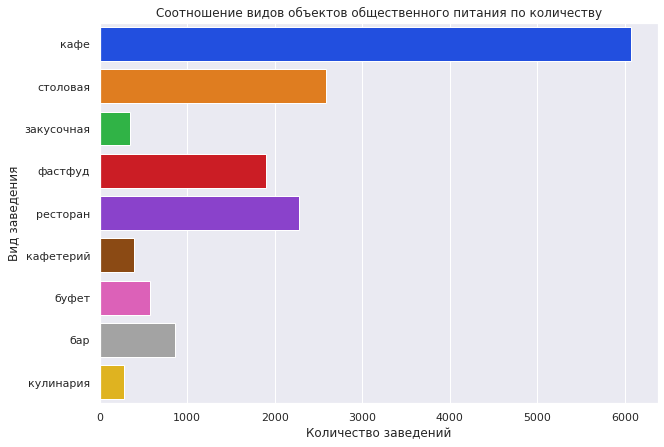

In [17]:
sns.countplot(y = 'object_type', data = df)
titles = {'xlabel':'Количество заведений', 'ylabel':'Вид заведения',
          'title': 'Соотношение видов объектов общественного питания по количеству'
         }
get_labels_and_axes(titles)
plt.show()

**Вывод**

Самый распространенный формат заведений в Москве - кафе. Из этого следует, что это формат с самым высоким количеством конкурентов. В тоже время можно предположить, что если количество заведений большое, то у потребителя есть спрос на данный формат объектов общественного питания

### Исследуем соотношение сетевых и несетевых заведений по количеству

Изучим общее количество сетевых и несетевых заведений

In [18]:
df['chain'].value_counts()

нет    12317
да      2964
Name: chain, dtype: int64

Поменяем значения на более понятные

In [19]:
df = df.replace({'chain' : { 'нет': 'одиночное', 'да': 'сетевое'}})

In [20]:
df['chain'].value_counts()

одиночное    12317
сетевое       2964
Name: chain, dtype: int64

Теперь построим график

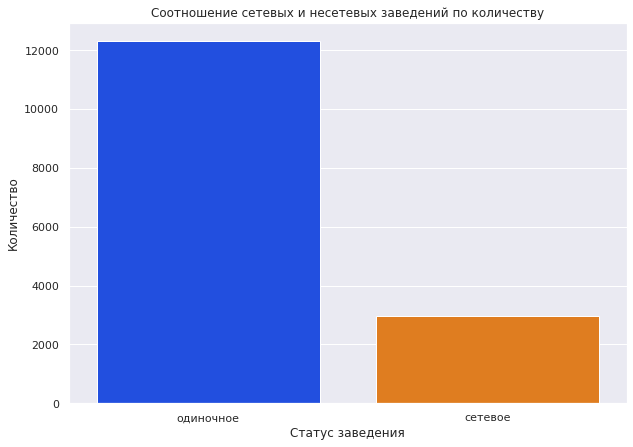

In [21]:
sns.countplot(x = 'chain', data = df)
titles = {'xlabel':'Статус заведения', 'ylabel':'Количество', 'title': 'Соотношение сетевых и несетевых заведений по количеству'}
get_labels_and_axes(titles)
plt.show()

**Вывод**

Несетевых заведений значительно больше. Думаю, это можно связать с тем, что далеко не каждое заведение общественного питания доходит до тех значений выручки, с которыми можно расширяться до сети. Да и не каждый ресторанный бизнес имеет амбиции по расширению путём открытия новых филиалов

### Ответим на вопрос: Для какого вида объекта общественного питания характерно сетевое распространение

Построим сводную таблицу, а также график к ней, чтобы увидеть процент сетевых заведений по каждому типу

In [22]:
chain_object_type = (df
 .pivot_table(index='object_type', columns = 'chain', values = 'id', aggfunc = 'count')
 .reset_index()
 .assign(part = lambda x: x['сетевое'] / (x['сетевое']+x['одиночное']))
 .sort_values(by = 'part', ascending=False)
)

In [23]:
chain_object_type.style.format(formatter={'part':'{:.2%}'})

chain,object_type,одиночное,сетевое,part
8,фастфуд,1109,788,41.54%
5,кулинария,195,78,28.57%
6,ресторан,1739,543,23.79%
3,кафе,4675,1396,22.99%
2,закусочная,292,56,16.09%
4,кафетерий,343,52,13.16%
0,бар,818,37,4.33%
1,буфет,565,11,1.91%
7,столовая,2581,3,0.12%


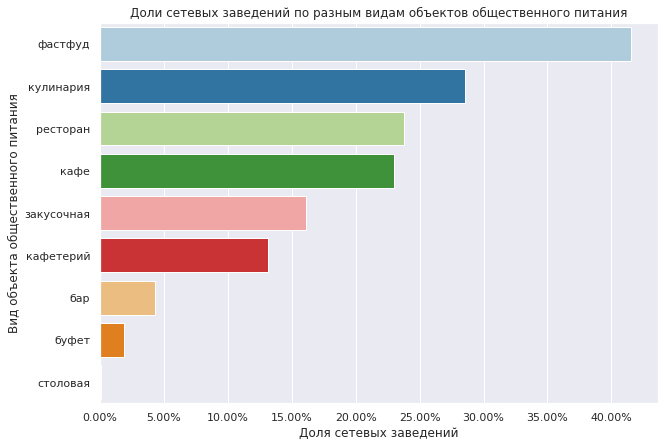

In [24]:
chain_objects_plot = sns.barplot(x = 'part', y = 'object_type', data=chain_object_type, palette = 'Paired')
vals = chain_objects_plot.get_xticks()
titles = {'xlabel':'Доля сетевых заведений', 
          'ylabel':'Вид объекта общественного питания', 
          'title': 'Доли сетевых заведений по разным видам объектов общественного питания'}
get_labels_and_axes(titles)
chain_objects_plot.set_xticklabels(['{:,.2%}'.format(x) for x in vals])
plt.show()

**Вывод**

Видим, что большая доля сетевых заведений встречается в предприятиях в простонародье именуемых *фастфуды*. Что логично, ведь для для этих заведений характерна дешевизна и чётко отработанная система взаимодействия сотрудников. Ниличие этих качеств и не зациклненность на других моментах ресторанного бизнеса, позволяет открывать почти одинаковые точки питания сразу во многих местах. А скорость приготовления и дешевизна обеспечит большой приток клиентов, что в свою очередь породит ещё большее расширение и открытие новых точек. *Пока фастфуды не заполонят собой всю вселенную(Но это не точно)*

### Какое распределение количества посадочных мест характерно для сетевых и несетевых заведений

Для ответа на этот вопрос построим график распределение количества посадочных мест для сетевых и несетевых заведений в зависимости от вида заведения

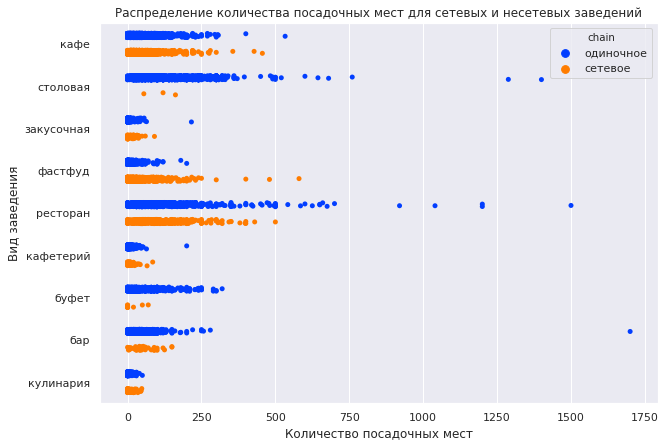

In [25]:
sns.stripplot(x = 'number', y = 'object_type', data = df, hue = 'chain', dodge = True)
titles = {'xlabel':'Количество посадочных мест', 
          'ylabel':'Вид заведения', 
          'title': 'Распределение количества посадочных мест для сетевых и несетевых заведений'}
get_labels_and_axes(titles)
plt.show()

**Вывод**

Для кафе распределение количества посадочных мест для сетевых и несетевых заведений практически совпадает.

Исходя их этого можем сделать вывод, что при открытии кафе следует ориентироваться на среднее количество посадочных мест характерное для данного формата заведения общественного питания.

### Зависимость количества посадочных мест по видам объектов

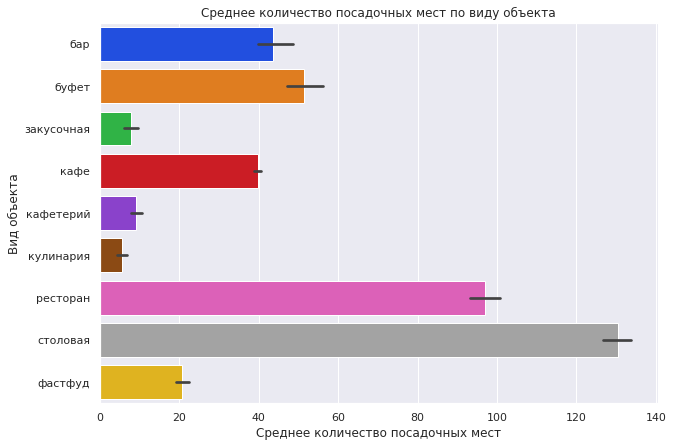

In [26]:
sns.barplot(x = 'number', y = 'object_type', data = df.sort_values('object_type'))
titles = {'xlabel':'Среднее количество посадочных мест', 
          'ylabel':'Вид объекта', 
          'title': 'Среднее количество посадочных мест по виду объекта'}
get_labels_and_axes(titles)
plt.show()

**Вывод**

Больше всего посадочных мест в столовых. Что не удивительно, ведь столовые рассчитаны на обслуживание большого количества человек в обеденный перерыв.

Меньше всего мест в кулинариях, закусочных и кафетериях. Все эти заведения как правило имеют доволльно скромные площади и направлены на достаточно узкий круг клиентов(покупатели в магазинах, при которых находятся кулинарии; закусочные рядом с заправками; кафетерии в аэропорту). То есть, как правило, такие заведения не являются местами, куда люди целенаправленно идут покушать, а скорее заглядывают перекусить по дороге.

Что примечательно, для предприятий фастфуда также характерно небольшое количество мест. Так происходит из за того, что формат быстрого питания предполагает постоянный трафик клиентов. К тому же в подобных заведениях пользуется спросом функция *"еда на вынос"*

### Улицы

#### Выделим отдельный столбец под название улиц

Возьмём столбец *address* и выделим из него названия отдельных улиц в столбец *street*

In [27]:
df = df.assign(street = lambda x: x['address'].str.split(',')
               .apply(lambda x: x[1] if 'город' not in x[1] and
               'поселение' not in x[1] else (
                   x[2] if 'корпус' not in x[2] else 'нет улицы')))

Посмотрим что получилось

In [28]:
df.head(15)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,одиночное,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,одиночное,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,одиночное,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,одиночное,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,одиночное,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица
6,148815,брусника,сетевое,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек
7,20957,буфет мтуси,одиночное,столовая,"город москва, авиамоторная улица, дом 8, строе...",90,авиамоторная улица
8,20958,кпф семья-1,одиночное,столовая,"город москва, авиамоторная улица, дом 8, строе...",150,авиамоторная улица
9,28858,столовая мтуси,одиночное,столовая,"город москва, авиамоторная улица, дом 8, строе...",120,авиамоторная улица


#### Рассмотрим топ-10 улиц с наибольшим количеством объектов

Создадим отдельный датафрейм, где посчитаем количество заведений на каждой из улиц

In [29]:
df_top_streets = (
    df.loc[df['street'] != 'нет улицы'].groupby(['street'])
    .agg(amount = ('id','count'))
    .sort_values(by = 'amount', ascending=False)
    .reset_index()
    .loc[:10]
)

При этом отсортировав по убыванию и оставив только топ-10. Значения "нет улицы" исключим, чтобы не мешало расчётам.

In [30]:
df_top_streets

,street,amount
0,проспект мира,203
1,профсоюзная улица,181
2,ленинградский проспект,170
3,пресненская набережная,167
4,варшавское шоссе,164
5,ленинский проспект,147
6,проспект вернадского,128
7,кутузовский проспект,114
8,каширское шоссе,111
9,кировоградская улица,108


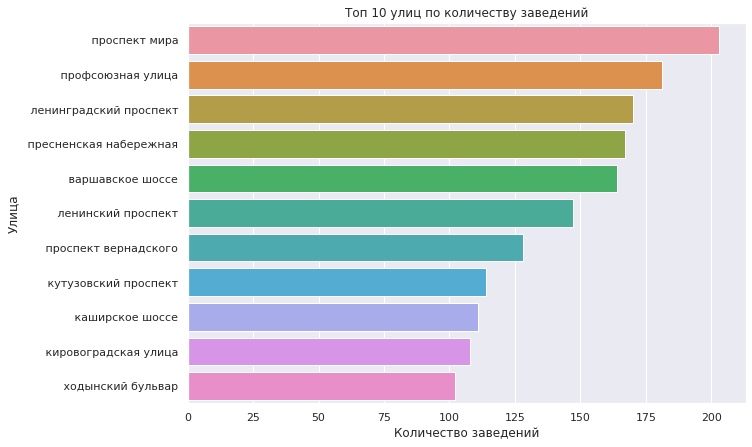

In [31]:
sns.barplot(y = 'street', x = 'amount', data = df_top_streets)
titles = {'xlabel':'Количество заведений', 
          'ylabel':'Улица', 
          'title': 'Топ 10 улиц по количеству заведений'}
get_labels_and_axes(titles)
plt.show()

#### Посмотрим в каких районах Москвы расположены эти улицы

Для начала создадим отдельный список с наиболее популярными улицами

In [32]:
df_streets_top_list  = df_top_streets['street'].to_list()

In [33]:
df_streets_top_list 

[' проспект мира',
 ' профсоюзная улица',
 ' ленинградский проспект',
 ' пресненская набережная',
 ' варшавское шоссе',
 ' ленинский проспект',
 ' проспект вернадского',
 ' кутузовский проспект',
 ' каширское шоссе',
 ' кировоградская улица',
 ' ходынский бульвар']

Создадим и отфильтруем датафрейм согласно списка этих улиц

In [34]:
df_filtered = df[df['street'].isin(df_streets_top_list)]

In [35]:
df_filtered

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,сетевое,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе
152,23618,кафе «subway»,сетевое,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе
153,155852,кафе «ламаджо»,одиночное,кафе,"город москва, варшавское шоссе, дом 29",30,варшавское шоссе
154,152556,шаурма в пите,одиночное,фастфуд,"город москва, варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе
155,120658,выпечка,одиночное,кафетерий,"город москва, варшавское шоссе, дом 100",2,варшавское шоссе
...,...,...,...,...,...,...,...
15325,198436,милти,сетевое,фастфуд,"город москва, ленинградский проспект, дом 80, ...",0,ленинградский проспект
15347,222491,кальянная «мята lounge»,сетевое,кафе,"город москва, профсоюзная улица, дом 142, корп...",40,профсоюзная улица
15350,213061,мята,сетевое,кафетерий,"город москва, каширское шоссе, дом 96, корпус 1",35,каширское шоссе
15358,213724,шоколадница,сетевое,кафе,"город москва, варшавское шоссе, дом 87б",54,варшавское шоссе


Теперь создадим датафрейм с уникальными адресами

In [36]:
df_addresses = pd.DataFrame({'unique_address' : df_filtered['address'].unique()})

In [37]:
df_addresses

,unique_address
0,"город москва, варшавское шоссе, дом 2"
1,"город москва, варшавское шоссе, дом 7, корпус 1"
2,"город москва, варшавское шоссе, дом 29"
3,"город москва, варшавское шоссе, дом 72, корпус 2"
4,"город москва, варшавское шоссе, дом 100"
...,...
588,"город москва, кутузовский проспект, дом 43"
589,"город москва, ленинградский проспект, дом 33, ..."
590,"город москва, ленинский проспект, дом 60/2"
591,"город москва, кутузовский проспект, дом 36, ст..."


Создадим функцию, которая получит для нас координаты через API Яндекс.Карт и прочитаем датафрейм из файла

In [38]:
def get_coordinates(address):
    base_url = "https://geocode-maps.yandex.ru/1.x"
    response = requests.get(base_url, params={
        "geocode": address,
        "apikey": '42096618-c47f-45f8-bca4-2c6eb2cbd672',
        "format": "json",
    })
    response.raise_for_status()
    found_places = response.json()['response']['GeoObjectCollection']['featureMember']

    if not found_places:
        return None

    most_relevant = found_places[0]
    coordinates = most_relevant['GeoObject']['Point']['pos'].split(' ')
    return coordinates

In [39]:
url = 'https://drive.google.com/file/d/1LworkYMR8ikIZW3Wbvlii0fzII0x1ntZ/view?usp=sharing'
path = 'https://drive.google.com/uc?id='+url.split('/')[-2]
df_addresses = pd.read_csv(path, sep=';')

Теперь нам понадобится функция поиска района

In [40]:
def get_district(coordinates):   
    base_url = "https://geocode-maps.yandex.ru/1.x"
    response = requests.get(base_url, params={
        "geocode": coordinates[0] + ',' + coordinates[1],
        "apikey": '42096618-c47f-45f8-bca4-2c6eb2cbd672',
        "format": "xml",
        'kind': 'district'
    })
    soup = BeautifulSoup(response.text, 'xml')
    result = soup.find_all('DependentLocalityName')
    for item in result:
        if 'район' in item.text:
            return item.text

Прочитаем датафрейм из файла и приведём столбец, по которому будем объединять, к единому названию. После этого можем спокойно объединять наши датафреймы

In [41]:
url = 'https://drive.google.com/file/d/1jEi1FxGGj75en3XE_vZ-FShxdRHInY0H/view?usp=sharing'
path = 'https://drive.google.com/uc?id='+url.split('/')[-2]
df_addresses_and_districts = pd.read_csv(path, sep=';')

In [42]:
df_addresses_and_districts.rename(columns={"unique_address": "address"},
                                  inplace=True)

In [43]:
df_filtered = df_filtered.merge(df_addresses_and_districts, on='address')

In [44]:
df_filtered

,id,object_name,chain,object_type,address,number,street,coordinates,district
0,155973,кафе «андерсон»,сетевое,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе,"['37.619683', '55.699949']",Донской район
1,204776,кальян бар,одиночное,бар,"город москва, варшавское шоссе, дом 2",24,варшавское шоссе,"['37.619683', '55.699949']",Донской район
2,23618,кафе «subway»,сетевое,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе,"['37.622405', '55.700877']",Донской район
3,166556,кафе суши wok,сетевое,фастфуд,"город москва, варшавское шоссе, дом 7, корпус 1",8,варшавское шоссе,"['37.622405', '55.700877']",Донской район
4,181111,кафе «doner city»,одиночное,фастфуд,"город москва, варшавское шоссе, дом 7, корпус 1",1,варшавское шоссе,"['37.622405', '55.700877']",Донской район
...,...,...,...,...,...,...,...,...,...
1590,221859,штолле,сетевое,кулинария,"город москва, кутузовский проспект, дом 43",10,кутузовский проспект,"['37.528855', '55.73811']",район Дорогомилово
1591,222301,стардогs,сетевое,фастфуд,"город москва, ленинградский проспект, дом 33, ...",0,ленинградский проспект,"['37.560484', '55.78646']",район Беговой
1592,214666,хинкальная №1,сетевое,ресторан,"город москва, ленинский проспект, дом 60/2",34,ленинский проспект,"['37.557682', '55.695829']",Гагаринский район
1593,218390,милти,сетевое,закусочная,"город москва, кутузовский проспект, дом 36, ст...",0,кутузовский проспект,"['37.526618', '55.742889']",район Дорогомилово


Дальше группируем по улицам и районам

In [45]:
df_objects_by_districts_and_streets  = (
    df_filtered.groupby(['street', 'district'])
    .agg(objects = ('id','count'))
    .reset_index()
)

In [46]:
df_objects_by_districts_and_streets 

,street,district,objects
0,варшавское шоссе,Донской район,34
1,варшавское шоссе,Нагорный район,16
2,варшавское шоссе,исторический район Волхонка-ЗИЛ,26
3,варшавское шоссе,район Нагатино-Садовники,8
4,варшавское шоссе,район Чертаново Северное,23
5,варшавское шоссе,район Чертаново Центральное,13
6,варшавское шоссе,район Чертаново Южное,39
7,варшавское шоссе,район Южное Бутово,2
8,каширское шоссе,район Москворечье-Сабурово,43
9,каширское шоссе,район Нагатино-Садовники,48


In [47]:
df_objects_by_districts  = (
    df_filtered.groupby(['district'])
    .agg(objects=('id', 'count'))
    .sort_values(by='objects', ascending=False)
    .reset_index()
)

In [48]:
df_objects_by_districts 

,district,objects
0,Пресненский район,167
1,Хорошёвский район,133
2,район Чертаново Центральное,90
3,район Тропарёво-Никулино,84
4,район Аэропорт,64
5,Мещанский район,63
6,район Свиблово,62
7,Обручевский район,62
8,район Дорогомилово,61
9,район Нагатино-Садовники,56


И строим график количества объектов по районам

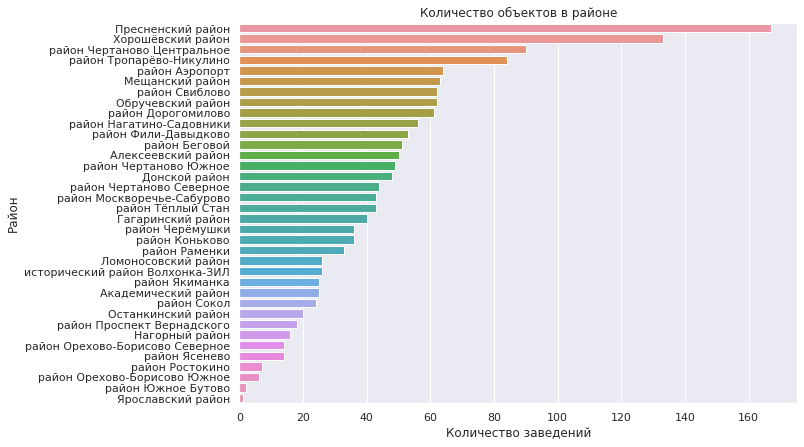

In [49]:
sns.barplot(y='district', x='objects', data=df_objects_by_districts)
titles = {'xlabel':'Количество заведений', 
          'ylabel':'Район', 
          'title': 'Количество объектов в районе'}
get_labels_and_axes(titles)
plt.show()

**Вывод**

Видим, что больше всего заведений у нас в Пресненском районе. Что не удивительно, ведь в нём расположены Москва-Сити и Экспоцентр(популярные места для туристов, к тому же большое количество офисных работников, которые ходят на обед). 
Следом с заметным отрывом идут Хороёвский район, Чертаново Центральное и Тропарёво-Никулино. В дальнейшем ситуация сглаживается и уже более плавно идёт на уменьшение по количеству объектов общественного питания

#### Теперь зайдём с другой стороны и посмотрим сколько улиц с единственным объектом общественного питания и где они находятся

По аналогии с предыдущим запросов, создадим датафрейм с уникальными адресами

In [50]:
df_streets_with_one_object = (
    df.groupby(['street'])
    .agg(amount = ('id','count'))
    .sort_values(by = 'amount', ascending = False)
    .reset_index()
    .loc[lambda x: x['amount'] == 1]
    .sort_values(by = 'street')
)

In [51]:
df_streets_with_one_object

,street,amount
1593,1-й балтийский переулок,1
1592,1-й басманный переулок,1
1590,1-й ботанический проезд,1
1586,1-й вешняковский проезд,1
1596,1-й голутвинский переулок,1
...,...,...
1585,ялтинская улица,1
1577,янтарный проезд,1
1591,ясногорская улица,1
1594,яузский бульвар,1


Наблюдаем целых 629 улиц. И все они с одним единственным объектом общественного питания

Теперь создадим список с этими улицами и отфильтруем по ним наш общий датафрейм. Это необходимо для того, чтобы заняться поиском координат по полному адресу(т.к. одна улица может находиться в двух или более районах).

In [52]:
df_streets_with_one_object_list = (
    df_streets_with_one_object['street'].to_list()
)

In [53]:
df_streets_with_one_object_list

[' 1-й балтийский переулок',
 ' 1-й басманный переулок',
 ' 1-й ботанический проезд',
 ' 1-й вешняковский проезд',
 ' 1-й голутвинский переулок',
 ' 1-й заречный переулок',
 ' 1-й зачатьевский переулок',
 ' 1-й кирпичный переулок',
 ' 1-й кожевнический переулок',
 ' 1-й кожуховский проезд',
 ' 1-й коптельский переулок',
 ' 1-й котельнический переулок',
 ' 1-й краснокурсантский проезд',
 ' 1-й курьяновский проезд',
 ' 1-й лучевой просек',
 ' 1-й люсиновский переулок',
 ' 1-й магистральный тупик',
 ' 1-й монетчиковский переулок',
 ' 1-й николощеповский переулок',
 ' 1-й новокузнецкий переулок',
 ' 1-й обыденский переулок',
 ' 1-й проезд марьиной рощи',
 ' 1-й рижский переулок',
 ' 1-й саратовский проезд',
 ' 1-й сельскохозяйственный проезд',
 ' 1-й сетуньский проезд',
 ' 1-й силикатный проезд',
 ' 1-й спасоналивковский переулок',
 ' 1-й тушинский проезд',
 ' 1-я аэропортовская улица',
 ' 1-я боевская улица',
 ' 1-я ватутинская улица',
 ' 1-я гражданская улица',
 ' 1-я карачаровская улица

In [54]:
df_filtered_with_one_object = (
    df[df['street'].isin(df_streets_with_one_object_list )]
)

In [55]:
df_filtered_with_one_object

,id,object_name,chain,object_type,address,number,street
19,153644,американская лаборатория десертов,одиночное,кафе,"город москва, филипповский переулок, дом 15/5",20,филипповский переулок
61,21214,столовая,одиночное,столовая,"город москва, бабаевская улица, дом 3",90,бабаевская улица
69,22139,хуанхэ,одиночное,ресторан,"город москва, 1-й балтийский переулок, дом 3/25",60,1-й балтийский переулок
81,25833,азербайджан,одиночное,ресторан,"город москва, улица демьяна бедного, дом 4",180,улица демьяна бедного
131,150881,вгик,одиночное,столовая,"город москва, будайская улица, дом 3",45,будайская улица
...,...,...,...,...,...,...,...
14807,214436,кафе,одиночное,буфет,"город москва, поселение ""мосрентген"", мкад, 44...",36,мкад
14810,206875,столовая,одиночное,столовая,"город москва, поселение первомайское, деревня ...",28,деревня поповка
14974,213930,горячий хлеб,одиночное,фастфуд,"город москва, поселение десеновское, улица дми...",0,улица дмитрия рябинкина
15017,205588,кофейня,одиночное,кафетерий,"город москва, поселение щаповское, улица евген...",16,улица евгения родионова


In [56]:
url = 'https://drive.google.com/file/d/1nqvV3yqu_K-Yox1zg6fRzOssiPCtF_XG/view?usp=sharing'
path = 'https://drive.google.com/uc?id='+url.split('/')[-2]
df_filtered_with_one_object_districts = pd.read_csv(path, sep=';')

Разобём строку с адресом и присвоим району второй элемент

In [57]:
df_filtered_with_one_object_districts['district'] = (
    df_filtered_with_one_object_districts['district']
    .fillna(df_filtered_with_one_object_districts['address']
    .str.split(',').apply(lambda x: x[1]))
)

Дальше сгруппируем и отдельно выведем топ-10

In [58]:
df_one_object_by_districts = (
    df_filtered_with_one_object_districts.groupby(['district'])
    .agg(objects=('id', 'count'))
    .sort_values(by='objects', ascending=False)
    .reset_index()
)

In [59]:
df_one_object_by_districts_top = df_one_object_by_districts.loc[:10]

In [60]:
df_one_object_by_districts_top

,district,objects
0,Таганский район,34
1,район Хамовники,27
2,Пресненский район,24
3,Басманный район,22
4,Тверской район,21
5,Нижегородский район,18
6,район Марьина Роща,17
7,район Сокольники,15
8,Мещанский район,14
9,район Замоскворечье,12


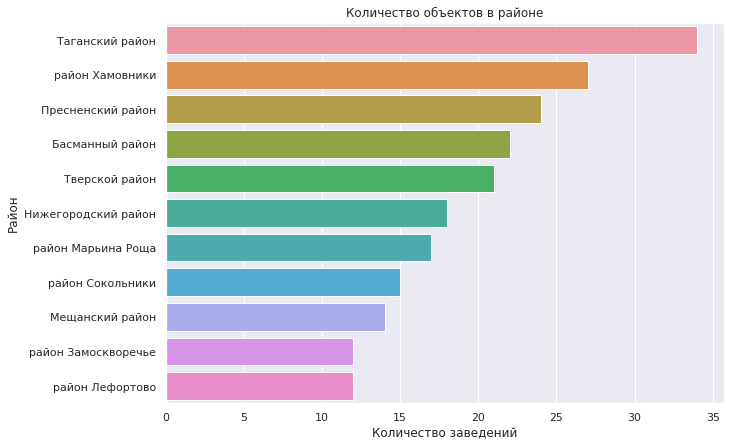

In [61]:
sns.barplot(y='district', x='objects', data=df_one_object_by_districts_top)
titles = {'xlabel':'Количество заведений', 
          'ylabel':'Район', 
          'title': 'Количество объектов в районе'}
get_labels_and_axes(titles)
plt.show()

**Вывод**

Улиц с одним едиснтвенным заведением общественного питания довольно много(больше 600). Снова видим в лидерах районы, которые расположены близко к центру Москвы: Таганский, Хамовники, Басманный, Тверской. В прочем, это не удитвительно. Ведь Москва старый город, а значит что в центре имеется огромное количество маленьких улочек и переулков, на которых и находятся эти едиственные "на всю улицу" заведения общественного питания.

#### Теперь посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

Для этого создадим функцию, которая принимает на вход адрес, разделяет на несколько подстрок и проверяет каждую подстроку на наличе в ней информации об улице

In [62]:
def get_street(address):
    street_list = ['улица', 'проспект', 'набережная', 
               'проезд', 'бульвар', 'шоссе', 
               'переулок', 'площадь', 'аллея', 
               'квартал', 'линия', 'тупик']
    for item in address.split(','):
        for string in street_list:
            if string in item:
                return item.strip()
    return 'Not found'          

Создадим список для удобства построения графика

In [63]:
street_list = df_top_streets['street'].to_list()

И посмотрим как выглядит распределение количества посадочных мест для улиц с большим количеством заведений

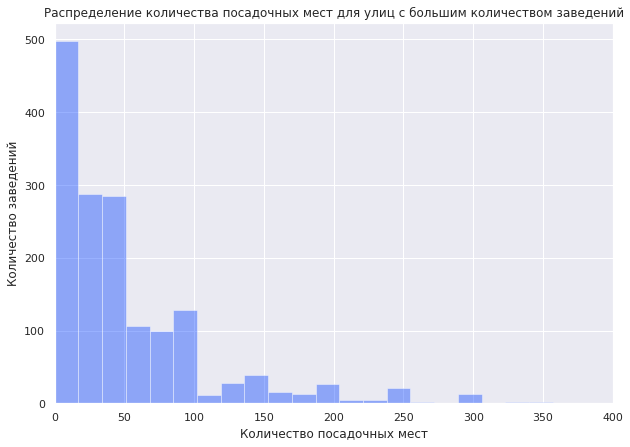

In [64]:
sns.distplot(df.loc[lambda x: x['street'].isin(street_list)]['number'], 
             kde=False,
             bins = 100)
plt.xlim(0,400)
titles = {'xlabel':'Количество посадочных мест', 
          'ylabel':'Количество заведений', 
          'title': 'Распределение количества посадочных мест для улиц с большим количеством заведений'}
get_labels_and_axes(titles)
plt.show()

**Вывод**

Господствуют заведения c количеством посадочных мест от 1 до 50. Это похоже на распределение количества посадочных мест для сетевых заведений, которое мы искали ранее. Затем идут объекты, где от 51 до 100 посадочных мест. И замыкают этот список заведения без посадки(видимо, они работают только на вынос).

## Общий вывод

Мы изучили рынок заведений общественного питания в Москве и установили, **что:**
- Самый распространенный формат заведений в Москве - кафе;
- Количество одиночных заведений гораздо больше их сетевых собратьев;
- Большая доля сетевых заведений встречается в предприятиях быстрого питания (они же - фастфуды);
- Для кафе распределение количества посадочных мест для сетевых и несетевых заведений практически совпадает;
- Наибольшим количеством посадочных мест обладают заведения типа *столовая* и *ресторан*, а наименьшим - *кулинария* и *закусочная*.

А так же мы нашли топ-10 улиц по количеству заведений общественного питания на них, определили в каких районах их больше всего; нашли улицы всего с одним заведением и определили их пристутсвие в тех или иных районах. И в добавок, посмотрели на распределение количества посадочных мест для улиц с большим количеством заведений.

**Исходя из нашего исследования, можно сделать некоторые рекомендации:**

1. Наиболее подходящим форматом при открытии нового заведения является кафе;

2. По количеству посадочных мест следует ориентироваться на среднее значение для кафе (около 40 мест);

3. Территориально определить оптимальное место сложно, т.к. мы не имеем информации о наличии и финансовой доступности конкретных плоащдей. Однако, кажется очевидным, что это должны быть районы в центральной части Москвы, т.к. большой туричтический трафик и наличие офисных зданий могут стать основой успешной работы завдения общественного питания.

Презентация: https://disk.yandex.ru/i/M8XWdu8_-z7G3g